# Práctica I: Python
## Ana Fernández Cruz y Jesús Gallego Olivas

## Práctica 1: Python para la ciencia de datos – Análisis del fichero mundo

El objetivo de esta práctica es utilizar los conocimientos adquiridos en la asignatura para realizar un análisis de distintas características de la población mundial basándonos en el fichero mundo.csv. La práctica se realizará en grupos de 2 personas y corresponde a un 50% de la nota de la asignatura. La fecha límite de entrega será el 23/11/2019 a las 23:59. Se permite la entrega hasta una semana después (30/11/2019), pero las prácticas que se entreguen en fechas posteriores al 23/11 tendrán como máximo una puntuación de 8 puntos. La entrega consistirá en un notebook de Python en el que se incluyan las respuestas a las preguntas planteadas, así como el código desarrollado para responderlas.

El fichero consta de una tabla con 26 columnas y 110 filas que contienen datos referentes a varias características de la población mundial. Se pide al alumno que, una vez leídos los datos, realice las siguientes operaciones con ellos:

1. Uno de los primeros pasos para realizar un buen análisis de datos es familiarizarnos con los datos que contiene el fichero a analizar. Para ello, calcularemos los estadísticos descriptivos elementales de las variables del fichero. Una vez cargados los datos en nuestro programa Python (utilizando la librería Pandas), calcula los siguientes valores para cada una de las variables:

    - Número de muestras (valores distintos de missing)
    - Media y desviación estándar
    - Valor mínimo y valor máximo

In [42]:
import pandas as pd
import numpy as np
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 999)

In [43]:
#Cargamos y mostramos el csv
df = pd.read_csv("mundo.csv")
df

,pa_s,poblac,densidad,urbana,relig,espvidaf,espvidam,alfabet,inc_pob,mortinf,pib_cap,regi_n,calor_as,sida,tasa_nat,tasa_mor,tasasida,log_pib,logtsida,nac_def,fertilid,log_pob,alfabmas,alfabfem,clima,region2
0,Acerbaján,7400,86.0,54.0,Musulma.,75,67,98.0,1.40,35.0,3000,5,NaN,NaN,23.0,7.0,NaN,3.477121,NaN,3.285714,2.80,3.869232,100.0,100.0,3.0,5.0
1,Afganistán,20500,25.0,18.0,Musulma.,44,45,29.0,2.80,168.0,205,3,NaN,0.0,53.0,22.0,0.000000,2.311754,0.000000,2.409091,6.90,4.311754,44.0,14.0,3.0,3.0
2,Alemania,81200,227.0,85.0,Protest.,79,73,99.0,0.36,6.5,17539,1,3443.0,11179.0,11.0,11.0,13.767241,4.244005,1.689544,1.000000,1.47,4.909556,NaN,NaN,8.0,1.0
3,Arabia Saudí,18000,7.7,77.0,Musulma.,70,66,62.0,3.20,52.0,6651,5,2874.0,61.0,38.0,6.0,0.338889,3.822887,0.805400,6.333333,6.67,4.255273,73.0,48.0,1.0,5.0
4,Argentina,33900,12.0,86.0,Católica,75,68,95.0,1.30,25.6,3408,6,3113.0,3904.0,20.0,9.0,11.516224,3.532500,1.630279,2.222222,2.80,4.530200,96.0,95.0,8.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,Uruguay,3200,18.0,89.0,Católica,77,71,96.0,0.80,17.0,3131,6,2653.0,469.0,17.0,10.0,14.656250,3.495683,1.710821,1.700000,2.44,3.505150,97.0,96.0,8.0,6.0
105,Uzbekistán,22600,50.0,41.0,Musulma.,72,65,97.0,2.13,53.0,1350,5,NaN,2.0,30.0,7.0,0.009050,3.130334,0.390236,4.285714,3.73,4.354108,100.0,100.0,2.0,5.0
106,Venezuela,20600,22.0,91.0,Católica,76,70,88.0,2.16,28.0,2829,6,2582.0,3511.0,26.0,5.0,16.483568,3.451633,1.751500,5.200000,3.05,4.313867,90.0,87.0,5.0,6.0
107,Vietnam,73100,218.0,20.0,Budista,68,63,88.0,1.78,46.0,230,3,2233.0,107.0,27.0,8.0,0.146375,2.361728,0.680916,3.375000,3.33,4.863917,93.0,83.0,5.0,3.0


In [3]:
#Definimos una función que nos ayude a calcular los datos que buscamos. Hay que tener en cuenta las variables
#que son string. 
def getStats(df, col):
    not_null = df[str(col)].notnull().sum()
    obj = [col,not_null,None ,None ,None ,None]
    colClean = df[col].dropna()
    if(len(colClean) != 0 and is_numeric_dtype(colClean)):
        obj = [col,not_null, round(colClean.mean(),3), round(colClean.std(),3), round(min(colClean)), round(max(colClean))]
    return obj

#Definimos una función generateTableStats que unificará los resultados de cada variable.
def generateTableStats(df):
    datas = []
    for col in df.columns:
        data = getStats(df, col)
        if(data != None):
            datas.append(data)
    return pd.DataFrame(datas, columns = ['Name','Not Missing', 'Mean', 'Std', 'Min', 'Max'])    

stats = generateTableStats(df)
stats

,Name,Not Missing,Mean,Std,Min,Max
0,pa_s,109,NaN,NaN,NaN,NaN
1,poblac,109,47723.881,146726.364,256.0,1205200.0
2,densidad,109,203.415,675.705,2.0,5494.0
3,urbana,108,56.528,24.203,5.0,100.0
4,relig,108,NaN,NaN,NaN,NaN
5,espvidaf,109,70.156,10.572,43.0,82.0
6,espvidam,109,64.917,9.273,41.0,76.0
7,alfabet,107,78.336,22.883,18.0,100.0
8,inc_pob,109,1.682,1.198,0.0,5.0
9,mortinf,109,42.313,38.079,4.0,168.0


2. Hay datos que nos interesa analizar basándonos en agrupaciones, para darle un sentido a nuestro análisis en base a esa agrupación. Basándonos en las siguientes agrupaciones:
       - Por región (columna región)
       - Por religión
   Calcula los siguientes estadísticos:
       - Número de observaciones
       - Número de valores ausentes (missing)
       - Mediana
       - Media
       - Varianza
       - Valores máximo y mínimo 
   Para las siguientes variables:
       - Incremento de la población
       - Esperanza de vida
       - Tasa de alfabetización (tanto masculina como femenina)
       - La mortalidad infantil
       - PIB per cápita
   ¿Qué conclusiones podemos sacar de estos cálculos? Comenta los resultados.

In [5]:
aggregation = {'Total': lambda x: x.notnull().sum() + x.isnull().sum(), 
                'Missing': lambda x: x.isnull().sum(),
                'Median': lambda x: round(x.median(), 3),
                'Mean': lambda x: round(x.mean(), 3), 
                'Std': lambda x: round(x.std(), 3), 
                'Min': min, 
                'Max':max}
aggregations = { 'inc_pob': aggregation, 'espvidaf': aggregation, 'espvidam': aggregation, 
                'alfabmas': aggregation, 'alfabfem': aggregation, 'mortinf': aggregation, 
                'pib_cap': aggregation }

In [6]:
#Agrupamos por religión
groupRelig = df.groupby('relig')
groupReligStats = groupRelig.agg(aggregations)

#Agrupamos por region.
groupRegion = df.groupby('regi_n')
groupRegionStats = groupRegion.agg(aggregations)

#Mostramos las primeras columnas de la agregación o agrupación por religión
groupReligStats.head()

/home/anabanana/.local/lib/python3.6/site-packages/pandas/core/groupby/generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


inc_pob                                          espvidaf          \
           Total Missing Median   Mean    Std   Min   Max    Total Missing   
relig                                                                        
Animista     4.0     0.0  2.855  2.878  0.330  2.50  3.30        4       0   
Budista      7.0     0.0  1.400  1.291  1.013 -0.09  2.90        7       0   
Católica    41.0     0.0  1.630  1.403  0.984 -0.30  3.07       41       0   
Indú         1.0     0.0  1.900  1.900    NaN  1.90  1.90        1       0   
Judía        1.0     0.0  2.220  2.220    NaN  2.22  2.22        1       0   

                 ... mortinf              pib_cap                              \
         Median  ...     Std   Min    Max   Total Missing   Median       Mean   
relig            ...                                                            
Animista   53.5  ...  18.628  77.0  118.0       4       0    383.0    505.500   
Budista    73.0  ...  38.261   4.4  112.0       7       0   1800.0   6406.571   
Católica   76.0  ...  33.667   6.2  117.0      41       0   2591.0   5780.171   
Indú       59.0  ...     NaN  79.0   79.0       1       0    275.0    275.000   
Judía      80.0  ...     NaN   8.6    8.6       1       0  13066.0  13066.000   

                                  
               Std    Min    Max  
relig                             
Animista   330.569    263    993  
Budista   7912.047    230  19860  
Católica  6751.126    208  22384  
Indú           NaN    275    275  
Judía          NaN  13066  13066  

[5 rows x 49 columns]

In [8]:
#Mostramos las primeras columnas de la agregación o agrupación por región
groupRegionStats.head()

inc_pob                                          espvidaf          \
         Total Missing Median   Mean    Std   Min   Max    Total Missing   
regi_n                                                                     
1         21.0     0.0  0.400  0.511  0.338  0.10  1.38       21       0   
2         14.0     0.0  0.255  0.240  0.323 -0.30  0.80       14       0   
3         17.0     0.0  1.780  1.651  0.857 -0.09  2.90       17       0   
4         19.0     0.0  2.800  2.723  0.456  1.46  3.30       19       0   
5         17.0     0.0  3.200  2.946  1.122  1.40  5.24       17       0   

               ... mortinf              pib_cap                            \
       Median  ...     Std   Min    Max   Total Missing Median       Mean   
regi_n         ...                                                          
1          80  ...   1.172   4.0    9.2      21       0  17245  16610.857   
2          76  ...   5.483   8.7   27.0      14       0   5368   5159.786   
3          69  ...  46.441   4.4  168.0      17       0    867   4263.000   
4          55  ...  28.653  39.3  137.0      19       0    409    998.684   
5          72  ...  19.179   8.6   76.4      17       0   3721   4957.412   

                               
             Std   Min    Max  
regi_n                         
1       3725.971  8060  23474  
2       1708.701  2340   7400  
3       6291.046   202  19860  
4       1178.258   122   4283  
5       4057.448   748  14193  

[5 rows x 49 columns]

3. Selecciona los países cuya tasa de mortalidad sea superior a la media. Comenta los resultados obtenidos.

In [11]:
#Calculamos el valor para la media en la tasa de mortalidad
mean_tasa_mor = df['tasa_mor'].mean()

#Filtramos las filas cuyas tasas de mortalidad sean superiores a la media
mort_great_tasa = df['tasa_mor'] > mean_tasa_mor
df[mort_great_tasa]

,pa_s,poblac,densidad,urbana,relig,espvidaf,espvidam,alfabet,inc_pob,mortinf,...,tasasida,log_pib,logtsida,nac_def,fertilid,log_pob,alfabmas,alfabfem,clima,region2
1,Afganistán,20500,25.0,18.0,Musulma.,44,45,29.0,2.80,168.0,...,0.000000,2.311754,0.000000,2.409091,6.90,4.311754,44.0,14.0,3.0,3.0
2,Alemania,81200,227.0,85.0,Protest.,79,73,99.0,0.36,6.5,...,13.767241,4.244005,1.689544,1.000000,1.47,4.909556,NaN,NaN,8.0,1.0
7,Austria,8000,94.0,58.0,Católica,79,73,99.0,0.20,6.7,...,14.375000,4.264723,1.704204,1.090909,1.50,3.903090,NaN,NaN,8.0,1.0
9,Bangladesh,125000,800.0,16.0,Musulma.,53,53,35.0,2.40,106.0,...,0.000858,2.305351,0.243590,3.181818,4.70,5.096910,47.0,22.0,5.0,3.0
11,Bélgica,10100,329.0,96.0,Católica,79,73,99.0,0.20,7.2,...,15.871287,4.253144,1.738291,1.090909,1.70,4.004321,NaN,NaN,8.0,1.0
12,Bielorusia,10300,50.0,65.0,Ortodoxa,76,66,99.0,0.32,19.0,...,0.097087,3.812913,0.627238,1.181818,1.88,4.012837,100.0,100.0,8.0,2.0
17,Bulgaria,8900,79.0,68.0,Ortodoxa,75,69,93.0,-0.20,12.0,...,0.269663,3.583312,0.769421,1.083333,1.80,3.949390,NaN,NaN,8.0,2.0
18,Burkina Faso,10000,36.0,15.0,Animista,50,47,18.0,2.81,118.0,...,41.930000,2.552668,2.111081,2.611111,6.94,4.000000,28.0,9.0,5.0,4.0
19,Burundi,6000,216.0,5.0,Católica,50,46,50.0,2.26,105.0,...,120.416667,2.318063,2.606978,2.095238,6.80,3.778151,61.0,40.0,8.0,4.0
20,Camboya,10000,55.0,12.0,Budista,52,50,35.0,2.90,112.0,...,0.000000,2.414973,0.000000,2.812500,5.81,4.000000,48.0,22.0,5.0,3.0


4. Obtén la tasa media de natalidad y mortalidad por clima. Ordena los países en base a esas tasas medias (de mayor a menor). ¿En qué climas se produce mayor natalidad? ¿En qué región se obtiene mayor mortalidad?

In [9]:
#Haciendo uso de agregaciones calcularemos la media de las tasas por clima
aggregation = {'Mean': lambda x: round(x.mean(), 3) }
aggregations = { 'tasa_nat': aggregation, 'tasa_mor': aggregation }
groupClima = df.groupby('clima')
groupClimaStats = groupClima.agg(aggregations)
groupClimaStats.columns = groupClimaStats.columns.map('.'.join).str.strip('.')
groupClimaStats

,tasa_nat.Mean,tasa_mor.Mean
clima,,
1.0,38.429,7.000
2.0,34.600,6.000
3.0,29.000,8.833
4.0,36.800,9.200
5.0,31.844,10.388
6.0,25.800,9.150
7.0,13.750,11.000
8.0,17.676,10.009
9.0,13.500,10.000


In [11]:
#Mostramos los datos con las dos columnas nuevas añadidas.
df_merged = pd.merge(df, groupClimaStats, on=['clima'], how='inner')
df_merged

,pa_s,poblac,densidad,urbana,relig,espvidaf,espvidam,alfabet,inc_pob,mortinf,...,logtsida,nac_def,fertilid,log_pob,alfabmas,alfabfem,clima,region2,tasa_nat.Mean,tasa_mor.Mean
0,Acerbaján,7400,86.0,54.0,Musulma.,75,67,98.0,1.40,35.0,...,NaN,3.285714,2.80,3.869232,100.0,100.0,3.0,5.0,29.0,8.833
1,Afganistán,20500,25.0,18.0,Musulma.,44,45,29.0,2.80,168.0,...,0.000000,2.409091,6.90,4.311754,44.0,14.0,3.0,3.0,29.0,8.833
2,Australia,17800,2.3,85.0,Protest.,80,74,100.0,1.38,7.3,...,1.926784,1.875000,1.90,4.250420,100.0,100.0,3.0,3.0,29.0,8.833
3,Bahrein,600,828.0,83.0,Musulma.,74,71,77.0,2.40,25.0,...,1.167235,7.250000,3.96,2.778151,55.0,55.0,3.0,5.0,29.0,8.833
4,México,91800,46.0,73.0,Católica,77,69,87.0,1.90,35.0,...,1.820425,5.600000,3.20,4.962843,90.0,85.0,3.0,6.0,29.0,8.833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,Irán,65600,39.0,57.0,Musulma.,67,65,54.0,3.46,60.0,...,0.680165,5.250000,6.33,4.816904,64.0,43.0,2.0,5.0,34.6,6.000
103,Jordania,3961,42.0,68.0,Musulma.,74,70,80.0,3.30,34.0,...,0.932356,7.800000,5.64,3.597805,89.0,70.0,2.0,5.0,34.6,6.000
104,Kuwait,1800,97.0,96.0,Musulma.,78,73,73.0,5.24,12.5,...,0.889090,14.000000,4.00,3.255273,77.0,67.0,2.0,5.0,34.6,6.000
105,Sudáfrica,43900,35.0,49.0,NaN,68,62,76.0,2.60,47.1,...,1.507723,4.250000,4.37,4.642465,NaN,NaN,2.0,4.0,34.6,6.000


In [13]:
#Ordenamos los países por su tasa de natalidad y los ordenamos de mayor a menor.
dfSort_Nat = df_merged.sort_values(by=['tasa_nat.Mean'] ,ascending=False)
dfSort_Nat

,pa_s,poblac,densidad,urbana,relig,espvidaf,espvidam,alfabet,inc_pob,mortinf,...,logtsida,nac_def,fertilid,log_pob,alfabmas,alfabfem,clima,region2,tasa_nat.Mean,tasa_mor.Mean
46,Somalia,6667,10.0,24.0,Musulma.,55,54,24.0,3.20,126.0,...,0.667642,3.538462,7.25,3.823930,36.0,14.0,1.0,4.0,38.429,7.0
40,Arabia Saudí,18000,7.7,77.0,Musulma.,70,66,62.0,3.20,52.0,...,0.805400,6.333333,6.67,4.255273,73.0,48.0,1.0,5.0,38.429,7.0
45,Siria,14900,74.0,50.0,Musulma.,68,65,64.0,3.70,43.0,...,0.714116,7.333333,6.65,4.173186,78.0,51.0,1.0,5.0,38.429,7.0
44,Omán,1900,7.8,11.0,Musulma.,70,66,NaN,3.46,36.7,...,1.116740,8.000000,6.53,3.278754,NaN,NaN,1.0,5.0,38.429,7.0
43,Iraq,19900,44.0,72.0,Musulma.,68,65,60.0,3.70,67.0,...,0.665616,6.285714,6.71,4.298853,70.0,49.0,1.0,5.0,38.429,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,Portugal,10500,108.0,34.0,Católica,78,71,85.0,0.36,9.2,...,1.788367,1.200000,1.50,4.021189,89.0,82.0,7.0,1.0,13.750,11.0
87,Suecia,8800,19.0,84.0,Protest.,81,75,99.0,0.52,5.7,...,1.626261,1.272727,2.10,3.944483,NaN,NaN,9.0,1.0,13.500,10.0
86,Rusia,149200,8.8,74.0,Ortodoxa,74,64,99.0,0.20,27.0,...,0.619375,1.181818,1.83,5.173769,100.0,100.0,9.0,2.0,13.500,10.0
85,Finlandia,5100,39.0,60.0,Protest.,80,72,100.0,0.30,5.3,...,1.253769,1.300000,1.80,3.707570,NaN,NaN,9.0,1.0,13.500,10.0


In [14]:
#Ordenamos los países por su tasa de mortalidad y los ordenamos de mayor a menor.
dfSort_Mor = df_merged.sort_values(by=['tasa_mor.Mean'] ,ascending=False)
dfSort_Mor

,pa_s,poblac,densidad,urbana,relig,espvidaf,espvidam,alfabet,inc_pob,mortinf,...,logtsida,nac_def,fertilid,log_pob,alfabmas,alfabfem,clima,region2,tasa_nat.Mean,tasa_mor.Mean
101,Portugal,10500,108.0,34.0,Católica,78,71,85.0,0.36,9.2,...,1.788367,1.200000,1.50,4.021189,89.0,82.0,7.0,1.0,13.750,11.000
100,Lituania,3800,58.0,69.0,Católica,77,68,99.0,0.30,17.0,...,0.666557,1.500000,2.00,3.579784,99.0,98.0,7.0,2.0,13.750,11.000
99,Letonia,2700,40.0,71.0,Protest.,75,64,99.0,0.50,21.5,...,0.784053,1.166667,2.00,3.431364,100.0,100.0,7.0,2.0,13.750,11.000
98,Estonia,1600,36.0,72.0,Protest.,76,67,99.0,0.52,19.0,...,0.715485,1.166667,2.00,3.204120,100.0,100.0,7.0,2.0,13.750,11.000
53,Costa Rica,3300,64.0,47.0,Católica,79,76,93.0,2.30,11.0,...,1.778381,6.500000,3.10,3.518514,93.0,93.0,5.0,6.0,31.844,10.388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,Irán,65600,39.0,57.0,Musulma.,67,65,54.0,3.46,60.0,...,0.680165,5.250000,6.33,4.816904,64.0,43.0,2.0,5.0,34.600,6.000
103,Jordania,3961,42.0,68.0,Musulma.,74,70,80.0,3.30,34.0,...,0.932356,7.800000,5.64,3.597805,89.0,70.0,2.0,5.0,34.600,6.000
104,Kuwait,1800,97.0,96.0,Musulma.,78,73,73.0,5.24,12.5,...,0.889090,14.000000,4.00,3.255273,77.0,67.0,2.0,5.0,34.600,6.000
105,Sudáfrica,43900,35.0,49.0,NaN,68,62,76.0,2.60,47.1,...,1.507723,4.250000,4.37,4.642465,NaN,NaN,2.0,4.0,34.600,6.000


5. Obtén el crecimiento económico de cada país basándote en el PIB y ordénalos de menor a mayor crecimiento económico. Realiza el mismo cálculo basándote ahora en el PIB per cápita.

NOTA: La variable PIB no está incluida en el fichero por lo que corresponde al alumno realizar su cálculo (basándonos en la población y el PIB per cápita, este cálculo es automático).

In [16]:
#Haciendo uso de las propiedades de pandas calculamos la columna del PIB.
df['pib'] = df.pib_cap * df.poblac
dfSort_PIB = df.sort_values(by=['pib'] ,ascending=True)

#Mostamos los datos que nos interesan con relación al pib, ordenando de menor a mayor pib.
dfSort_PIB[['pa_s','poblac','pib','pib_cap']]

,pa_s,poblac,pib,pib_cap
44,Gambia,959,336609,351
67,Liberia,2900,1186100,409
19,Burundi,6000,1248000,208
85,Rep. C. Africana,3300,1508100,457
10,Barbados,256,1779200,6950
...,...,...,...,...
60,Italia,58100,1016750000,17500
42,Francia,58000,1098752000,18944
2,Alemania,81200,1424166800,17539
61,Japón,125500,2492430000,19860


In [17]:
#Mostramos los datos ordenando por pib per capita
dfSort_PibCap = df.sort_values(by=['pib_cap'] ,ascending=True)
dfSort_PibCap[['pa_s','poblac','pib','pib_cap']]

,pa_s,poblac,pib,pib_cap
39,Etiopía,55200,6734400,122
9,Bangladesh,125000,25250000,202
1,Afganistán,20500,4202500,205
19,Burundi,6000,1248000,208
107,Vietnam,73100,16813000,230
...,...,...,...,...
42,Francia,58000,1098752000,18944
61,Japón,125500,2492430000,19860
22,Canadá,29100,579206400,19904
97,Suiza,7000,156688000,22384


6. Representa  la  información  obtenida  en  el  ejercicio  5  mediante  un  diagrama  de barras, pero sólo con los 20 países con el PIB más alto.

In [22]:
#Ordenamos los valores por su pib
dfPib = df.sort_values(by=['pib'] ,ascending=False)
dfPibHigher20 = dfPib.head(20)
dfPibHigher20

,pa_s,poblac,densidad,urbana,relig,espvidaf,espvidam,alfabet,inc_pob,mortinf,...,log_pib,logtsida,nac_def,fertilid,log_pob,alfabmas,alfabfem,clima,region2,pib
37,Estados Unidos,260800,26.0,75.0,Protest.,79,73,97.0,0.99,8.11,...,4.370587,2.752316,1.666667,2.06,5.416308,97.0,97.0,8.0,NaN,6122019200
61,Japón,125500,330.0,77.0,Budista,82,76,99.0,0.30,4.40,...,4.297979,0.893078,1.571429,1.55,5.098644,NaN,NaN,6.0,3.0,2492430000
2,Alemania,81200,227.0,85.0,Protest.,79,73,99.0,0.36,6.50,...,4.244005,1.689544,1.000000,1.47,4.909556,NaN,NaN,8.0,1.0,1424166800
42,Francia,58000,105.0,73.0,Católica,82,74,99.0,0.47,6.70,...,4.277472,2.201645,1.397849,1.80,4.763428,NaN,NaN,8.0,1.0,1098752000
60,Italia,58100,188.0,69.0,Católica,81,74,97.0,0.21,7.60,...,4.243038,2.070582,1.100000,1.30,4.764176,98.0,96.0,6.0,1.0,1016750000
90,Rusia,149200,8.8,74.0,Ortodoxa,74,64,99.0,0.20,27.00,...,3.824776,0.619375,1.181818,1.83,5.173769,100.0,100.0,9.0,2.0,996656000
46,Gran Bretaña,58400,237.0,89.0,Protest.,80,74,99.0,0.20,7.20,...,4.203414,1.729047,1.181818,1.83,4.766413,NaN,NaN,8.0,1.0,932881600
22,Canadá,29100,2.8,77.0,Católica,81,74,97.0,0.70,6.80,...,4.298940,2.008476,1.750000,1.80,4.463893,NaN,NaN,9.0,NaN,579206400
36,España,39200,77.0,78.0,Católica,81,74,95.0,0.25,6.90,...,4.115511,2.280936,1.222222,1.40,4.593286,97.0,93.0,8.0,1.0,511442400
24,China,1205200,124.0,26.0,Taoista,69,67,78.0,1.10,52.00,...,2.576341,0.316042,3.000000,1.84,6.081059,87.0,68.0,8.0,3.0,454360400


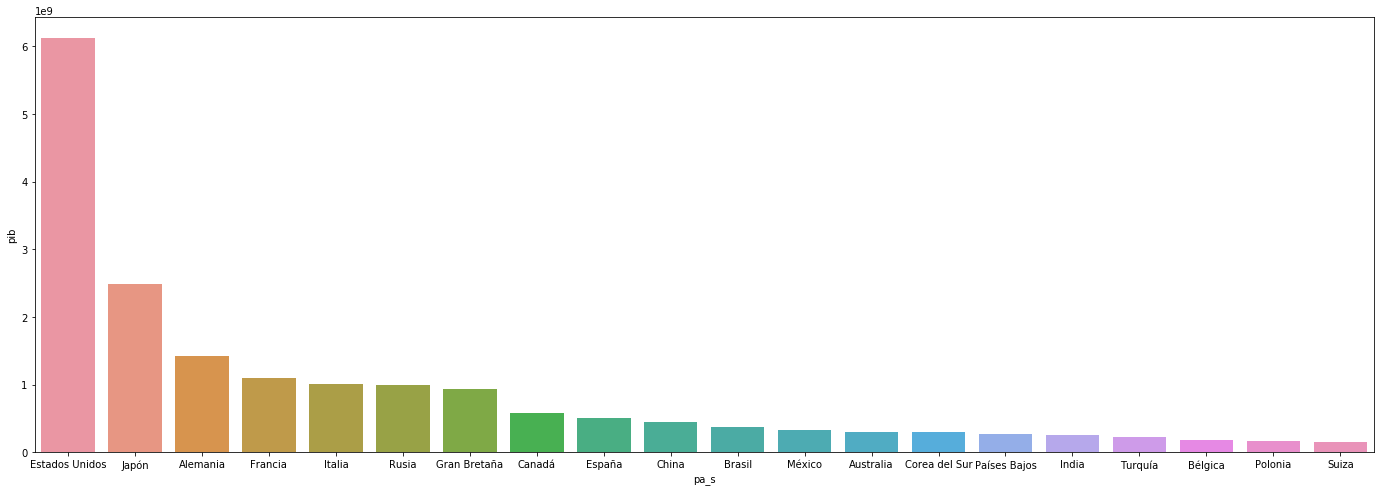

In [33]:
plt.figure(figsize=(24, 8)) #seteamos el tamaño del gráfico
sns.barplot(dfPibHigher20['pa_s'],dfPibHigher20['pib'] )

7. Representa mediante un swarmplot la tasa de natalidad por región y añade como tercera variable categórica el clima. ¿Tiene sentido el gráfico obtenido en relación a los datos? Comenta el resultado.

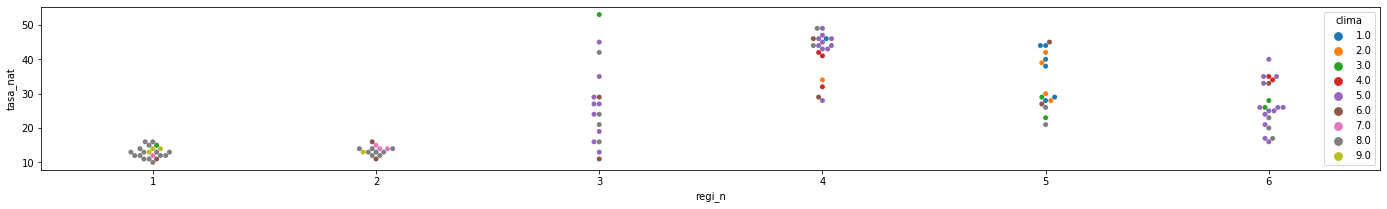

In [37]:
plt.figure(figsize=(24, 3))
ax = sns.swarmplot(y=df['tasa_nat'], x=df['regi_n'], hue=df['clima'])

8. Representa mediante un boxplot la tasa de natalidad por clima. Comenta los resultados.

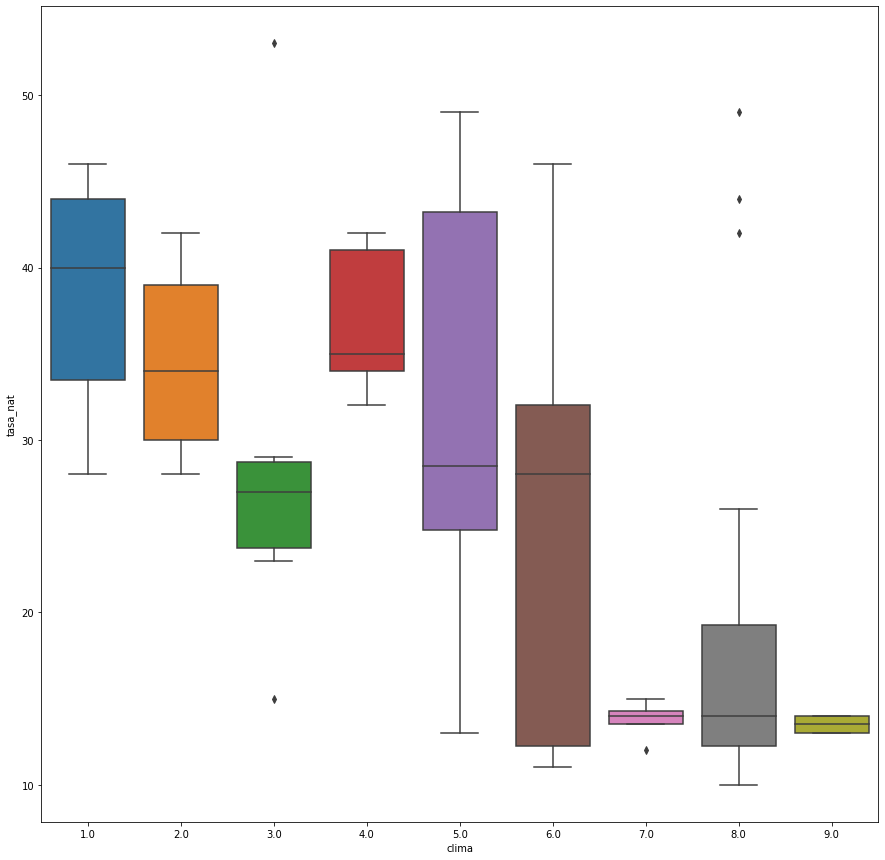

In [39]:
plt.figure(figsize=(15, 15))
ax = sns.boxplot(x=df['clima'], y=df['tasa_nat'])

9. Selecciona dos o más variables que te llamen la atención y analiza los datos mediante las gráficas o mediciones estadísticas que consideres oportunas y comenta los resultados que obtengas.

<Figure size 2160x2160 with 0 Axes>

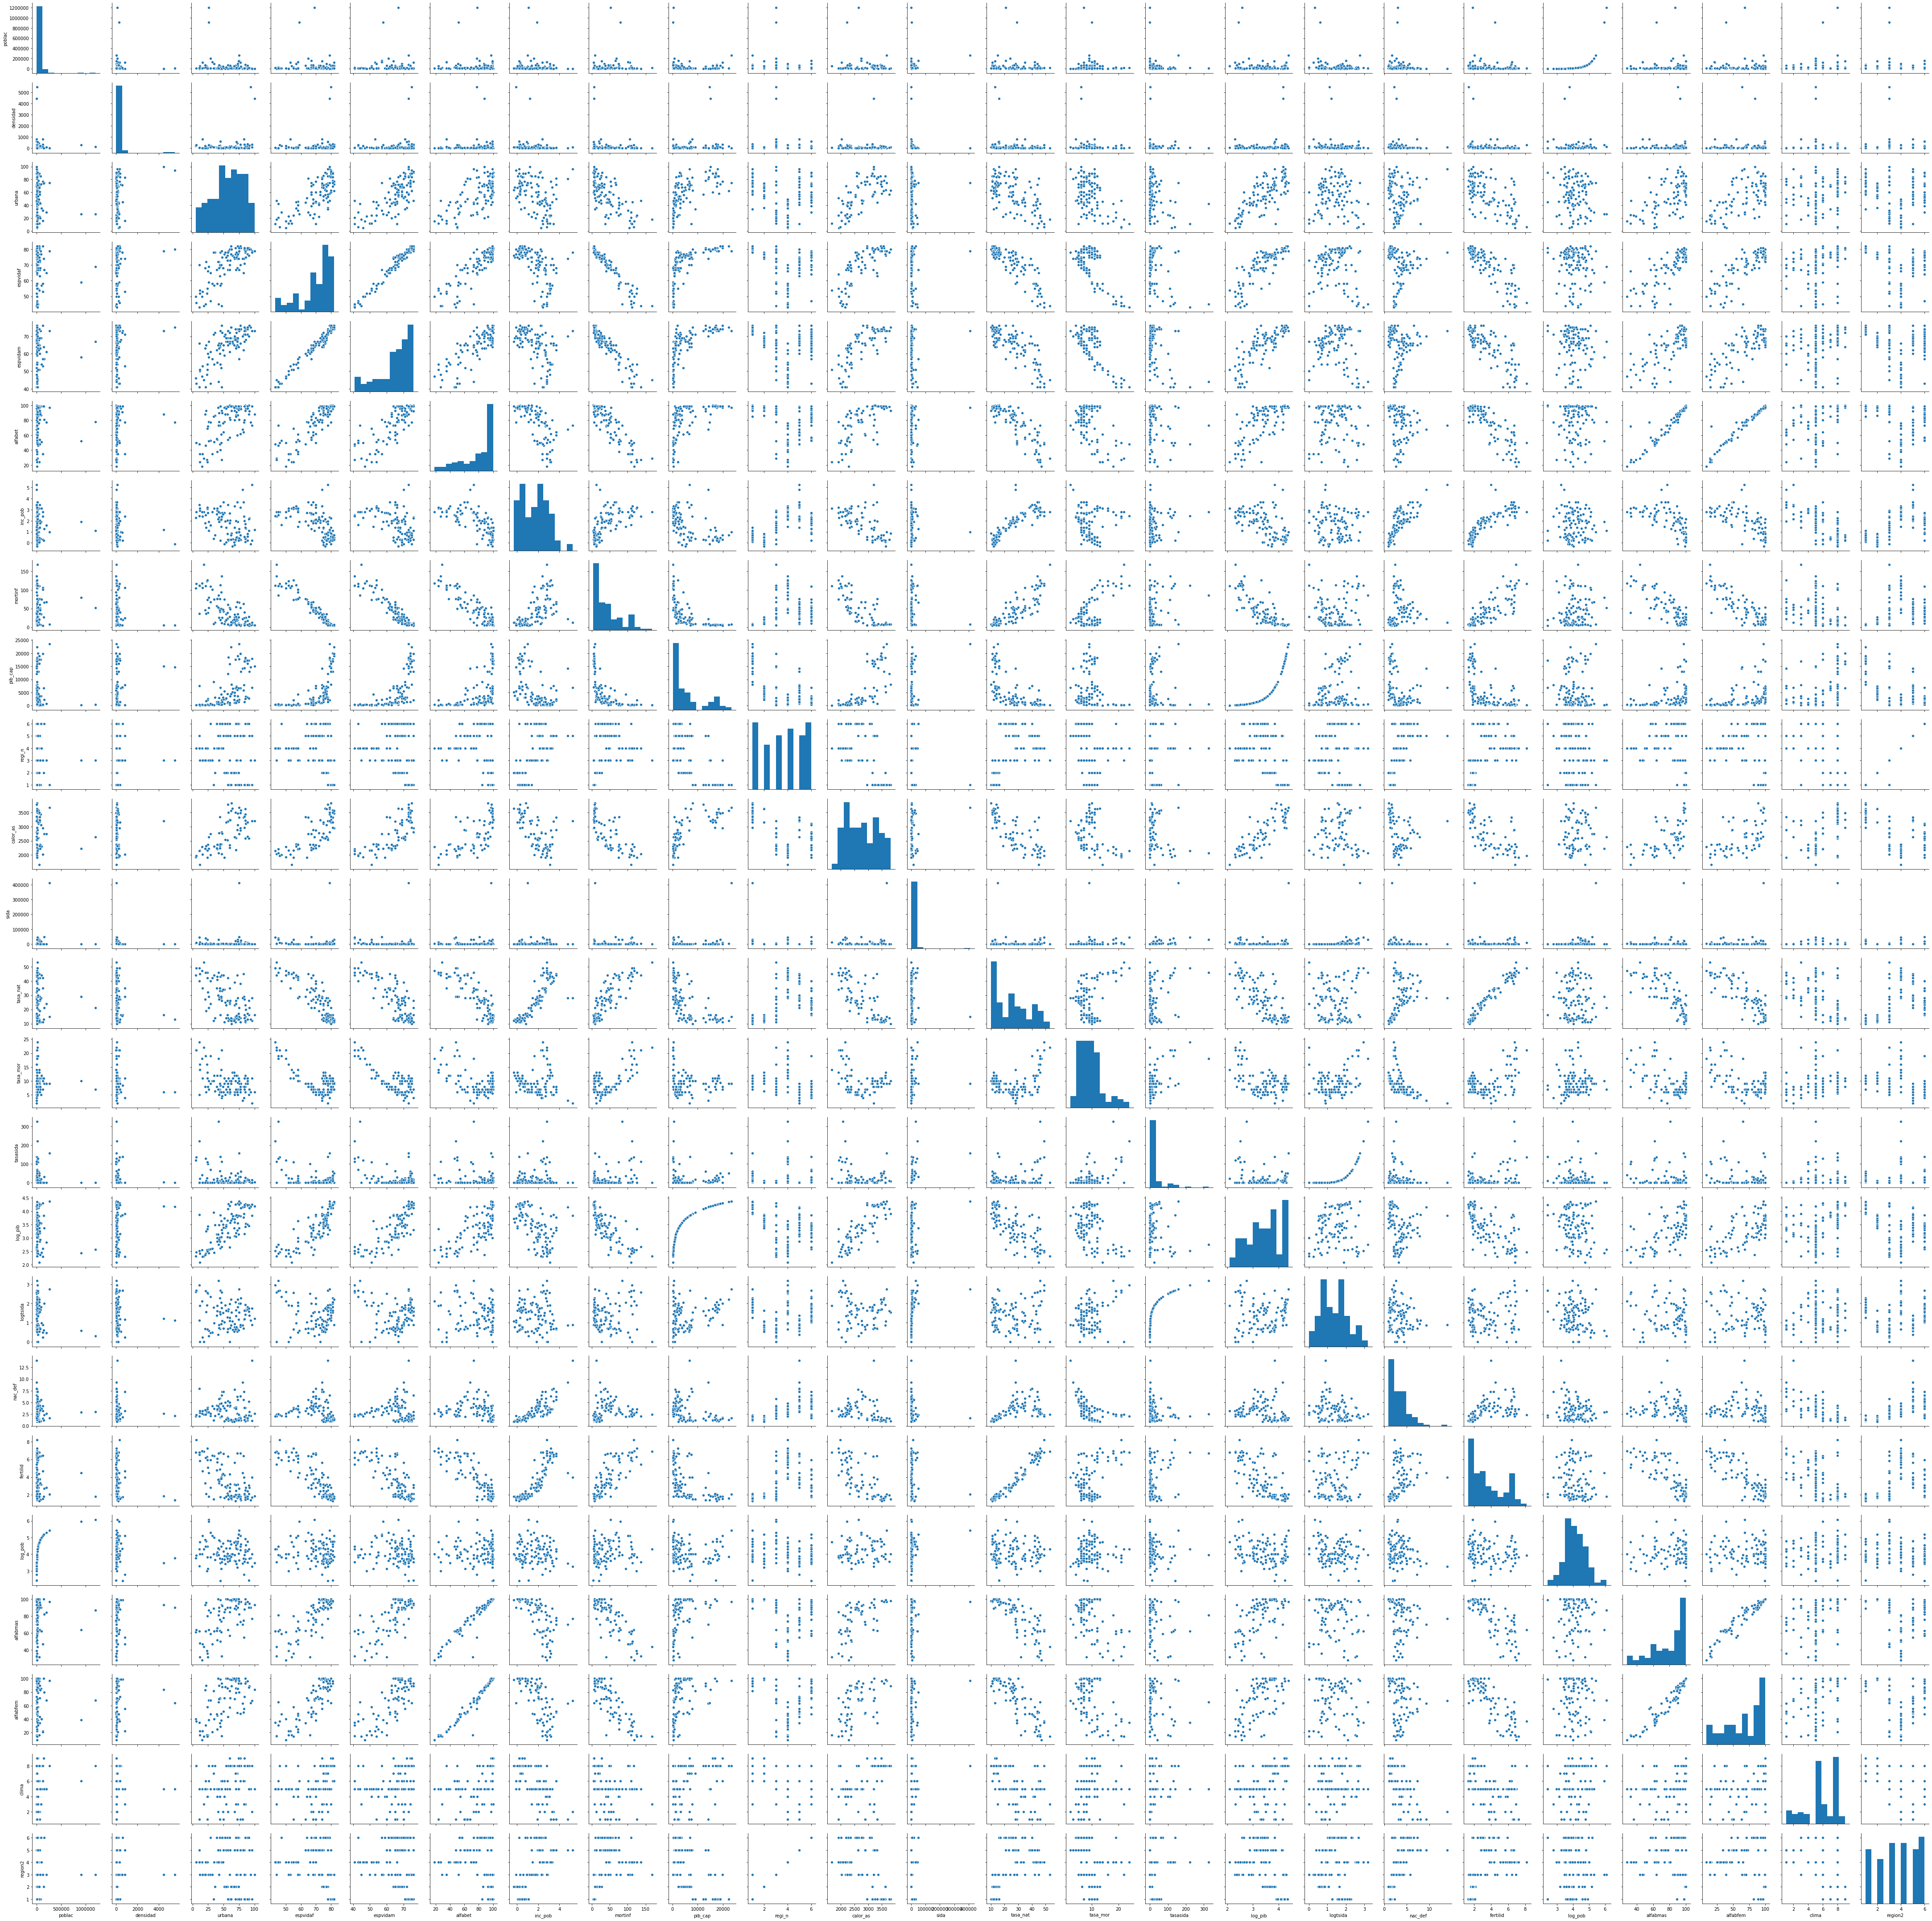

In [51]:
plt.figure(figsize=(30, 30))
#ax = sns.scatterplot(df['espvidam'], df['espvidaf'])
#ax = sns.pairplot(df)